**Install and Import Dependencies**


In [ ]:
!pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

pd.set_option('display.max_columns', None)
sns.set_theme()

**Load Data**


In [ ]:

customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeI


**Customer Analysis**

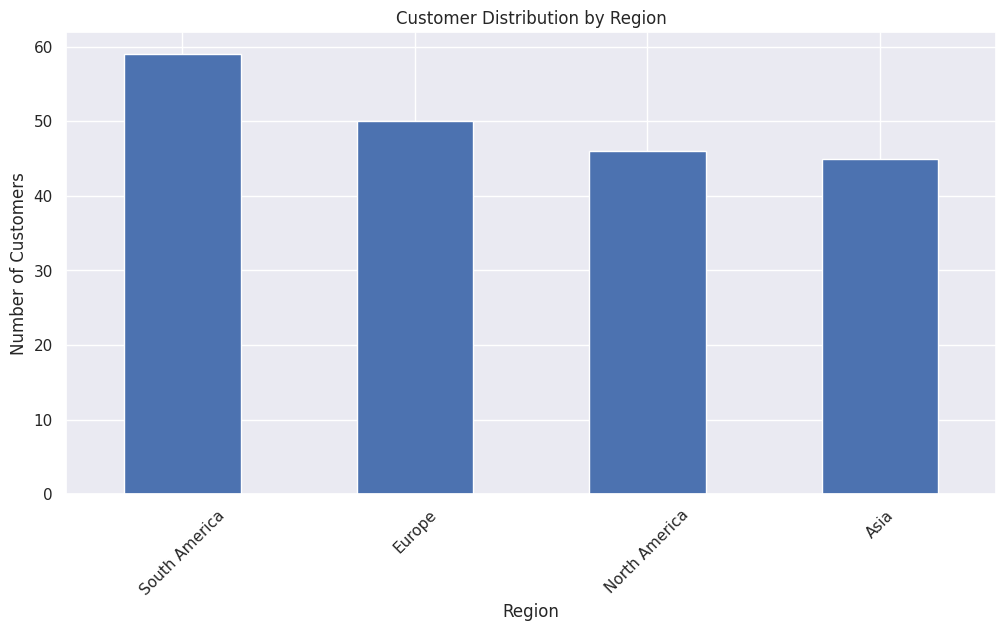

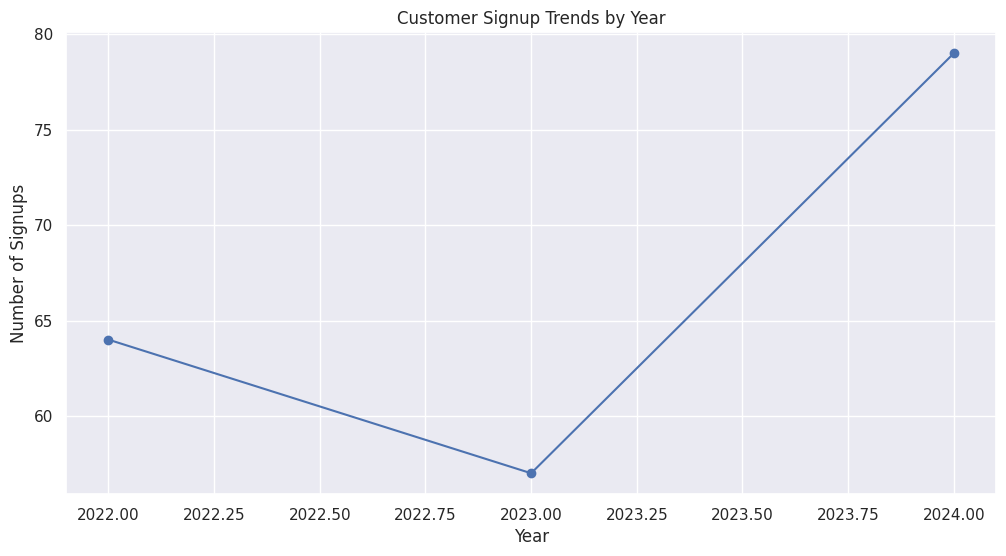

In [ ]:

plt.figure(figsize=(12, 6))
customers['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
customers['SignupDate'].dt.year.value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Customer Signup Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

**Product Analysis**

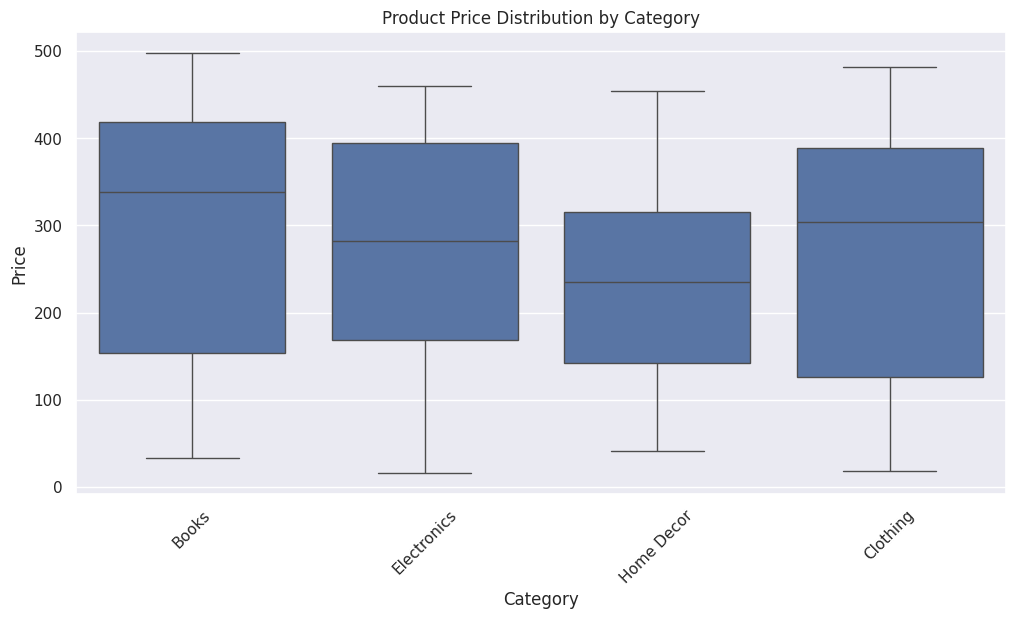

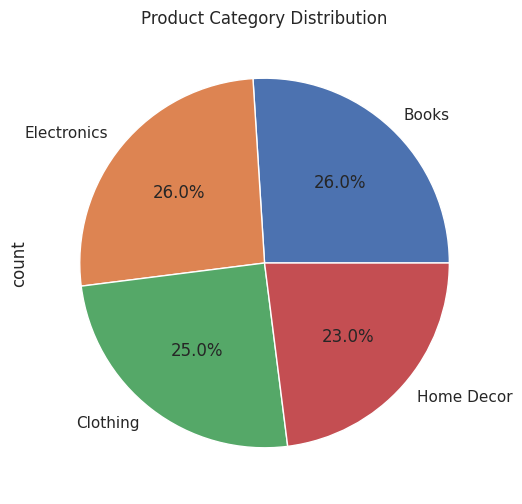

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products)
plt.title('Product Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
products['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.show()

**Transaction Analysis**

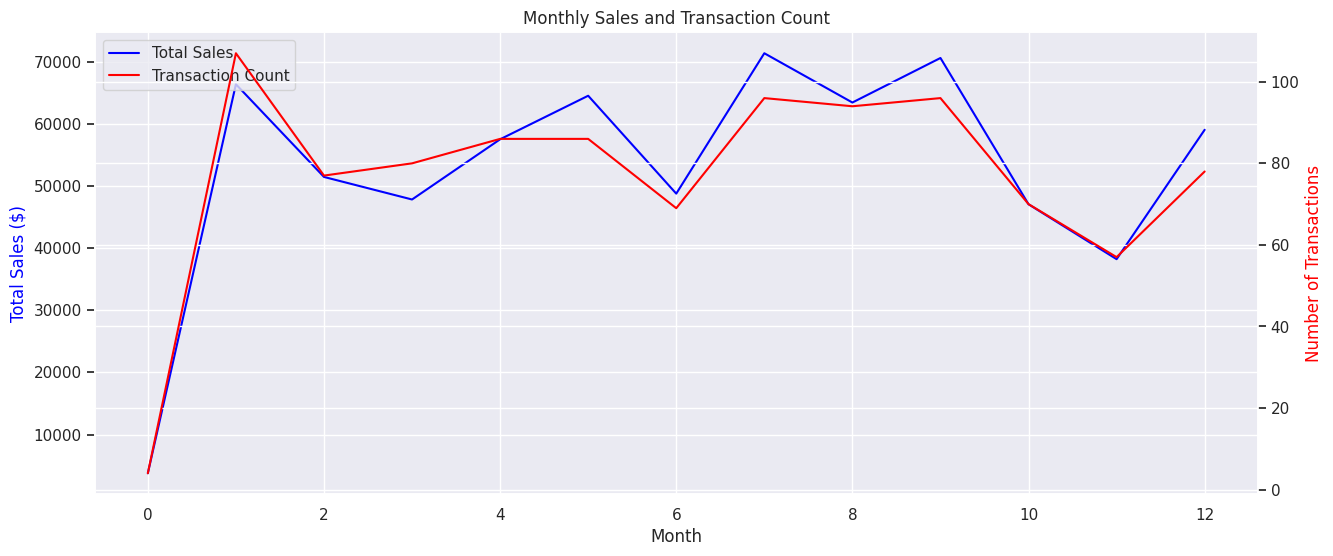

In [ ]:

monthly_sales = transactions.groupby(
    transactions['TransactionDate'].dt.to_period('M')
).agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

ax1.plot(range(len(monthly_sales)), monthly_sales['TotalValue'],
         color='blue', label='Total Sales')
ax2.plot(range(len(monthly_sales)), monthly_sales['TransactionID'],
         color='red', label='Transaction Count')

plt.title('Monthly Sales and Transaction Count')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales ($)', color='blue')
ax2.set_ylabel('Number of Transactions', color='red')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

**Customer Purchase Behavior**

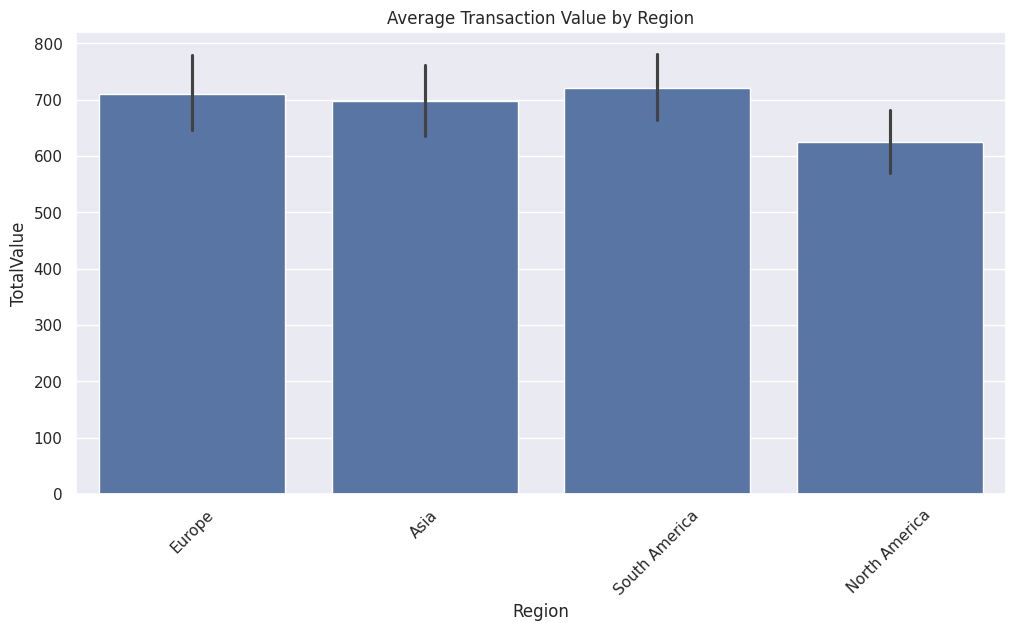

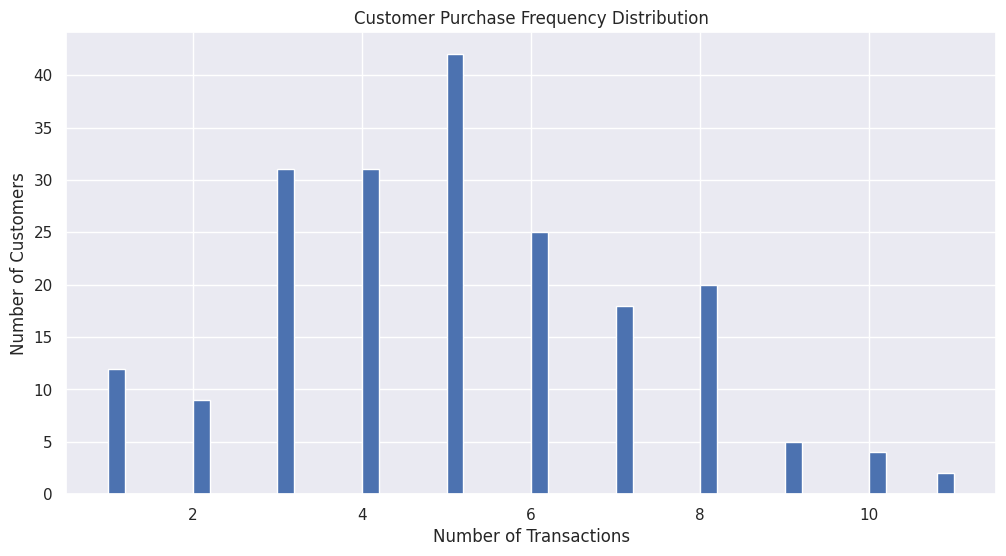

In [ ]:

customer_transactions = transactions.merge(customers[['CustomerID', 'Region']],
                                         on='CustomerID')
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='TotalValue', data=customer_transactions)
plt.title('Average Transaction Value by Region')
plt.xticks(rotation=45)
plt.show()

customer_frequency = transactions.groupby('CustomerID')['TransactionID'].count()
plt.figure(figsize=(12, 6))
plt.hist(customer_frequency, bins=50)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

**Key Insights**

In [ ]:

metrics = {
    'total_customers': len(customers),
    'total_products': len(products),
    'total_transactions': len(transactions),
    'total_revenue': transactions['TotalValue'].sum(),
    'avg_transaction_value': transactions['TotalValue'].mean(),
    'top_categories': products['Category'].value_counts().head(),
    'top_regions': customers['Region'].value_counts().head()
}

insights = [
    f"1. Customer Base: Total {metrics['total_customers']} customers across "
    f"{len(metrics['top_regions'])} regions, with {metrics['top_regions'].index[0]} "
    f"being the largest market.",

    f"2. Product Portfolio: {metrics['total_products']} products across various "
    f"categories, with {metrics['top_categories'].index[0]} being the most common.",

    f"3. Transaction Overview: {metrics['total_transactions']} transactions "
    f"processed with total revenue of ${metrics['total_revenue']:,.2f}.",

    f"4. Average Transaction Value: ${metrics['avg_transaction_value']:,.2f} "
    "indicating the typical purchase amount.",

    "5. Regional Performance: " + ", ".join([
        f"{region}: {count} customers"
        for region, count in metrics['top_regions'].head(3).items()
    ])
]

for insight in insights:
    print(insight + "\n")

1. Customer Base: Total 200 customers across 4 regions, with South America being the largest market.

2. Product Portfolio: 100 products across various categories, with Books being the most common.

3. Transaction Overview: 1000 transactions processed with total revenue of $689,995.56.

4. Average Transaction Value: $690.00 indicating the typical purchase amount.

5. Regional Performance: South America: 59 customers, Europe: 50 customers, North America: 46 customers

